In [81]:
import pandas as pd

df= pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [82]:
movies= pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [83]:
df= pd.merge( df, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df1= df.groupby('title')['rating']
df1.head()

0         4.0
1         4.0
2         1.5
3         4.0
4         3.0
         ... 
105334    2.5
105335    2.5
105336    2.5
105337    4.0
105338    3.5
Name: rating, Length: 30490, dtype: float64

In [103]:
df1.mean().sort_values(ascending=False).head()

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

In [87]:
df1.count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [104]:
ratings= pd.DataFrame( df1.mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [105]:
ratings['no_of_ratings']= pd.DataFrame(df1.count())
ratings.head()

,rating,no_of_ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


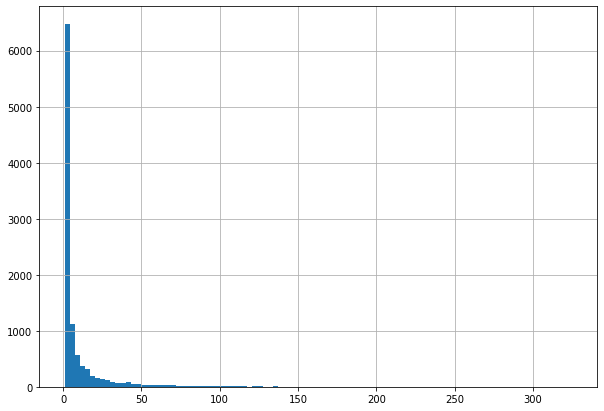

In [106]:
plt.figure(figsize=(10,7))
ratings['no_of_ratings'].hist(bins=100)

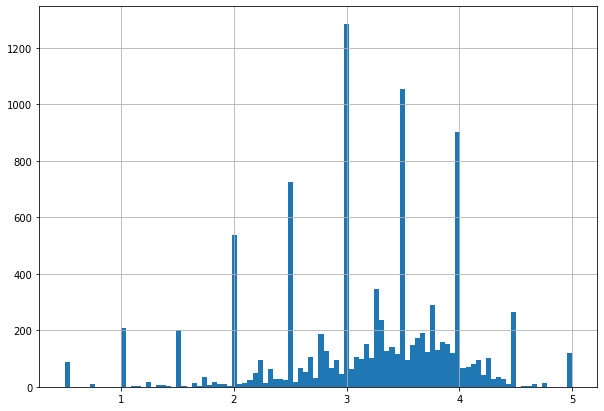

In [107]:
plt.figure(figsize=(10,7))
ratings['rating'].hist(bins=100)

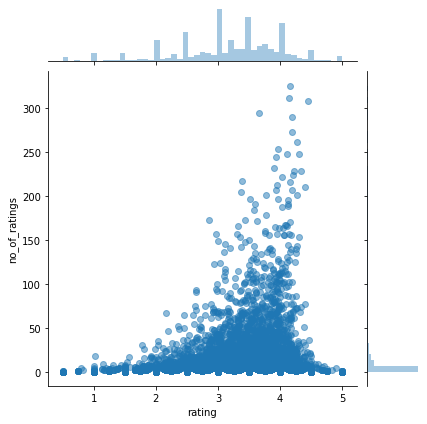

In [108]:
sns.jointplot(x='rating', y='no_of_ratings', data=ratings, alpha=0.5)

In [109]:
movielist= df.pivot_table(index= 'userId', columns= 'title', values='rating')
movielist.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
ratings.sort_values('no_of_ratings', ascending=False).head()

,rating,no_of_ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


In [112]:
mission_ratings= movielist['Mission: Impossible - Ghost Protocol (2011)']
ironman_ratings= movielist['Iron Man (2008)']
mission_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Mission: Impossible - Ghost Protocol (2011), dtype: float64

In [113]:
recommended_mission= movielist.corrwith(mission_ratings)
recommeneded_ironman= moviemat.corrwith(ironman_ratings)

In [115]:
corr_mission= pd.DataFrame(recommended_mission, columns=['Correlation'])
corr_mission.dropna(inplace=True)
corr_mission.head()

,Correlation
title,
(500) Days of Summer (2009),0.025482
...And Justice for All (1979),-1.000000
10 Things I Hate About You (1999),0.478345
101 Dalmatians (1996),-0.755929
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.866025


In [116]:
corr_mission.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Tommy (1975),1.0
Star Trek V: The Final Frontier (1989),1.0
Star Trek: Nemesis (2002),1.0
James and the Giant Peach (1996),1.0
White Sands (1992),1.0
"Name of the Rose, The (Name der Rose, Der) (1986)",1.0
"Man Who Shot Liberty Valance, The (1962)",1.0
Badlands (1973),1.0
Mission: Impossible - Ghost Protocol (2011),1.0


In [117]:
corr_mission= corr_mission.join(ratings['no_of_ratings'])
corr_mission.head()

,Correlation,no_of_ratings
title,,
(500) Days of Summer (2009),0.025482,37
...And Justice for All (1979),-1.000000,10
10 Things I Hate About You (1999),0.478345,59
101 Dalmatians (1996),-0.755929,42
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.866025,37


In [118]:
corr_mission[corr_mission['no_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no_of_ratings
title,,
Jaws (1975),0.738549,109
Back to the Future (1985),0.668984,213
Total Recall (1990),0.660561,107
Clear and Present Danger (1994),0.641624,134
"Wizard of Oz, The (1939)",0.628539,111


In [119]:
corr_ironman= pd.DataFrame(recommeneded_ironman, columns=['Correlation'])
corr_ironman.dropna(inplace=True)
corr_ironman= corr_ironman.join(ratings['no_of_ratings'])
corr_ironman[corr_ironman['no_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no_of_ratings
title,,
Being John Malkovich (1999),0.695728,124
"Mask, The (1994)",0.643554,146
Terminator 2: Judgment Day (1991),0.551834,253
Men in Black (a.k.a. MIB) (1997),0.504627,172
Inception (2010),0.502084,103
